0
1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[0, 0.002065624776544316, 0.00516406194136079, 0.00922547106779389, 0.012910154853401974, 0.017385398981324282, 0.023063677669484722, 0.02781411305627054, 0.03227538713350493, 0.037685072795366426, 0.043463497453310705, 0.05035446998069343, 0.057659194173711806, 0.06523937486592661, 0.06953528264067635, 0.07443123938879458, 0.08068846783376232, 0.08661104367721988, 0.09421268198841606, 0.10314362491955596, 0.10865874363327675, 0.11596662620633194, 0.12588617495173357, 0.13357997572379918, 0.1441479854342795, 0.16000000000000003, 0.1630984371648165, 0.1677460929120412, 0.17383820660169086, 0.1793652322801

<BarContainer object of 101 artists>

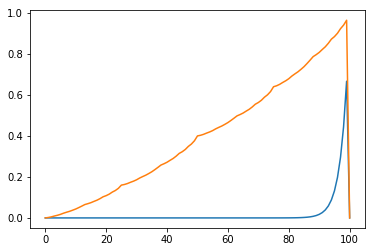

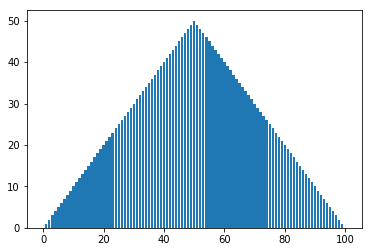

In [165]:
import numpy as np
from matplotlib import pyplot as plt

#Define the amount to win. This is the same as the number of states
win = 100

#Define total reward when reaching win state
reward = 1 

#Define tolerance
theta = 1e-20

#Probability of winning bet
p_win = 0.4
p_loose = 1 - p_win

#Define srsa function
def transition(sp, r, s, a):
    if sp == s + a:
        trans = p_win
    elif sp == s - a:
        trans = p_loose
    else:
        trans = 0
    return trans

#Intitialize states and values
states = list(range(win+1))

#Define inital actions from each state except terminal states
initial_action = [0]*(win + 1)
for i in states[1:win]:
    initial_action[i] = 1

def evaluate(action,states):
    #Initialize values 
    value = list(range(win+1))
    for i in states:
        value[i] = 0
    
    #Implement policy evaluation
    substates = states[1:win]
    Delta = 1
   
    while Delta > theta:
        Delta = 0
        for i in states[1:win]:
            val = value[i]
            change = action[i]
            #define reward
            if i + change == win:
                r = reward
            else: 
                r = 0
            value[i] = transition(i-change,r,i,action[i])*(value[i-change]) + transition(i+change,r,i,action[i])*(r + value[i+change])
            Delta = max(Delta,abs(val - value[i]))
    return value

def maximize(action,state):
    current_action = action[state]
    max_value = value[state]
    #don't bet more than to get to win state, or more than you have
    max_bet = min(state,win-state)
    for i in states[1:max_bet+1]:
        if i + state == win:
            r = reward
        else: 
            r = 0
        val = transition(state-i,r,state,i)*(value[state-i]) +  transition(state+i,r,state,i)*(r + value[state+i])
        if val > max_value:
            current_action = i
            max_value = val
    return current_action

def improve(action,states):
    stable = 1
    for i in states[1:win]:
        old_action = action[i]
        action[i] = maximize(action,i)
        if old_action != action[i]:
            stable = 0
    return action,stable

def best_action(initial_action,states):
    stable = 0
    action = initial_action
    while stable == 0:
        value = evaluate(action,states)  
        action,stable = improve(action,states)
        print(stable)
    return action
        
value = evaluate(initial_action,states)  

plt.figure(0)
plt.plot(value)

optimal_action = best_action(initial_action,states)

print(optimal_action)

value_opt = evaluate(optimal_action,states) 

print(value_opt)

plt.plot(value_opt)

plt.figure(1)
plt.bar(states,optimal_action)


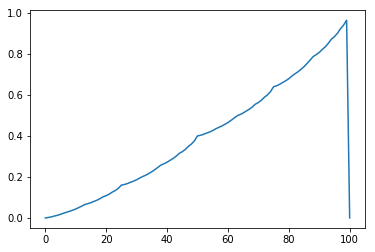

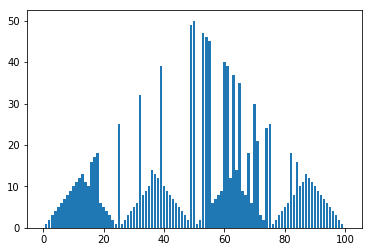

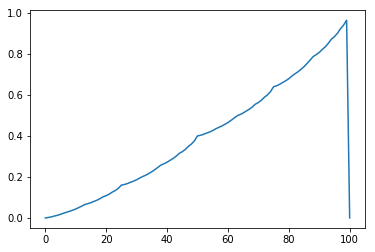

In [167]:
#This is the second solution using value iteration

import numpy as np
from matplotlib import pyplot as plt

#Define the amount to win. This is the same as the number of states
win = 100

#Define total reward when reaching win state
reward = 1

#Define tolerance
theta = 1e-20

#Probability of winning bet
p_win = 0.4
p_loose = 1 - p_win

#Define srsa function
def transition(sp, r, s, a):
    if sp == s + a:
        trans = p_win
    elif sp == s - a:
        trans = p_loose
    else:
        trans = 0
    return trans


#Intitialize states, values, and actions
states = list(range(win+1))
action = [0]*(win + 1)
value = list(range(win+1))
                 
for i in states:
    value[i] = 0


def maximize_value(state,value,action):
    max_val = value[state]
    #don't bet more than to get to win state, or more than you have
    max_bet = min(state,win-state)
    
    for i in states[1:max_bet+1]:
        if i + state == win:
            r = reward
        else: 
            r = 0
        val = transition(state-i,r,state,i)*(value[state-i]) +  transition(state+i,r,state,i)*(r + value[state+i])
        if val > max_val:
            max_val = val
            action = i
    return max_val, action


#Maximize value function
def optimal_value():
    #Initialize values 
  
    
    #Implement policy evaluation
    Delta = 1
   
    while Delta > theta:
        Delta = 0
        for i in states[1:win]:
            val = value[i]
            newval, newaction = maximize_value(i,value,action[i])
            value[i] = newval
            action[i] = newaction
            Delta = max(Delta,abs(val - value[i]))
    return value,action


value,action = optimal_value()

plt.figure(0)
plt.plot(value)

plt.figure(1)
plt.bar(states,action)

value2 = evaluate(action,states)  

plt.figure(2)
plt.plot(value2)





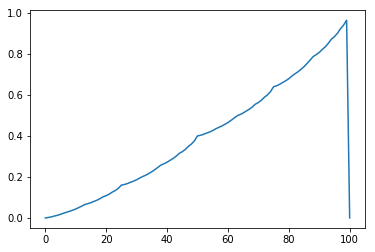

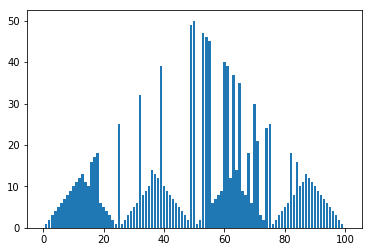

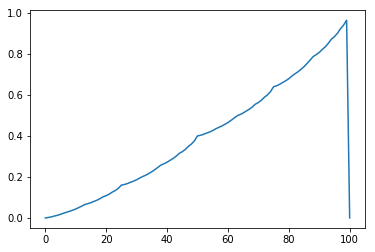

In [168]:
plt.figure(0)
plt.plot(value)

plt.figure(1)
plt.bar(states,action)

value2 = evaluate(action,states)  

plt.figure(2)
plt.plot(value2)




In [131]:
#Check solution
check = list(range(win+1))
for i in substates:
        change = action[i]
        if i + change == win:
            r = 100
        else: 
            r = 0
        check[i] = transition(i-change,r,i,action[i])*(value[i-change]) + transition(i+change,r,i,action[i])*(r + value[i+change])

#print(value)
#print(check)



1 2


In [5]:
initial_action = [0]*(win + 1)
for i in states[1:win]:
    initial_action[i] = 1

print(initial_action)
print(win)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
30


In [97]:
test = np.array(range(win+1))
print(test)
for i in range(win+1):
        test[i] = 0
test[3] = 2
print(test)

[ 0  1  2  3  4  5  6  7  8  9 10]
[0 0 0 2 0 0 0 0 0 0 0]


In [173]:
import mdptoolbox.example
P, R = mdptoolbox.example.forest()
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()
vi.policy # result is (0, 0, 0)

print(R)

[[0. 0.]
 [0. 1.]
 [4. 2.]]
